# Introduction

**Objective**

1. Organise in Comprehensible form
2. Visualise
3. Summarize

---

# Statistics

* Population = set of all individuals relevant to a particular statistical question. 
> When we select a smaller group from a population we do sampling. 
* Sample =  smaller group selected from a population
> The individual elements of a population or a sample go under many names. You'll often see the elements of a population referred to as individuals, units, events, observations
* difference between the metrics of a population and the metrics of a sample, can be seen as an error, and because it's the result of sampling, it's called sampling error.
> A metric specific to a population is called a parameter, while one specific to a sample is called a statistic.

<center>${sampling error} = {parameter} - {statistics}$</center>

---
* ## Sampling Error
> In statistical terms, we want our samples to be representative of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wnba.csv')

In [3]:
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
df.shape

(143, 32)

In [5]:
df.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [6]:
parameter = df['Games Played'].max()
statistics = df['Games Played'].sample(30,random_state=1).max()
"Sampling Statistics: {}".format(parameter-statistics)

'Sampling Statistics: 2'

In [7]:
population_mean = df['PTS'].mean()
sample_mean = []
for i in range(100):
    sample = df['PTS'].sample(10,random_state=i)
    sample_mean.append(sample.mean())


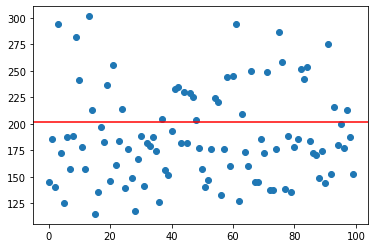

In [8]:
plt.scatter(range(100),sample_mean)
plt.axhline(population_mean,c='red')

In [9]:
print("The samples Min underestimates and Max overestimates ")
print("Min: {0}\nMax: {1}".format(min(sample_mean),max(sample_mean)))

The samples Min underestimates and Max overestimates 
Min: 115.0
Max: 301.4


sample means tend to vary less and less around the population mean as we increase the sample size .
> When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which in turn decreases the chances that we'll get an unrepresentative sample.

* ## Straying sample 

> simple random sampling is entirely random, it can leave out certain population individuals that are of great interest

To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups, and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group. i.e stratifying by player position

> This sampling method is called stratified sampling, and each stratified group is also known as a stratum.

In [10]:
df['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

In [11]:
df['PPG'] = df['PTS'] / df['Games Played']

In [12]:
def pos(i):
    return df[df['Pos']==i]
    

In [13]:
df_dc = {}

for i in df['Pos'].unique():
    name = "df_" + i
    df_dc[name] = df[df['Pos'] == i]

In [14]:
df_dc.keys()

dict_keys(['df_F', 'df_G/F', 'df_G', 'df_C', 'df_F/C'])

In [15]:
df_dc_mean = {}
for k,v in df_dc.items():
    sample = v.sample(10,random_state=0)
    mean_sample = sample['PPG'].mean()
    df_dc_mean[k] = mean_sample

In [16]:
max(df_dc_mean,key=df_dc_mean.get)

'df_C'

In [17]:
# Solution
# wnba = df.copy()
# wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# # Stratifying the data in five strata
# stratum_G = wnba[wnba.Pos == 'G']
# stratum_F = wnba[wnba.Pos == 'F']
# stratum_C = wnba[wnba.Pos == 'C']
# stratum_GF = wnba[wnba.Pos == 'G/F']
# stratum_FC = wnba[wnba.Pos == 'F/C']

# points_per_position = {}
# for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
#                 (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
#     sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sapling on each stratum
#     points_per_position[position] = sample.mean()
    
# position_most_points = max(points_per_position, key = points_per_position.get)
# position_most_points

---

In [18]:
print("Min: {}\nMax: {}".format(df['Games Played'].min(),df['Games Played'].max()))

Min: 2
Max: 32


Approximately 72.7% of the players had more than 23 games for the 2016-2017 season, which means that the mean of the total points is probably influenced by this category of players who played a lot of games

In [19]:
df['Games Played'].value_counts(bins =3 ,normalize=True)*100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

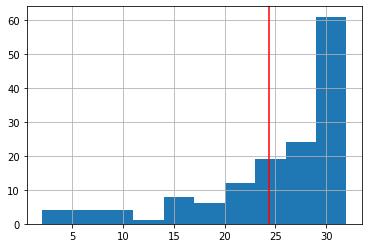

In [20]:
df['Games Played'].hist()
plt.axvline(df['Games Played'].mean(),c='red')

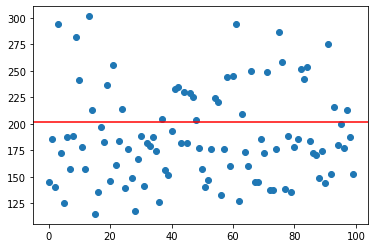

In [21]:
plt.scatter(range(100),sample_mean)
plt.axhline(population_mean,c='red')

---
use stratified sampling while being mindful of the proportions in the population. We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations.

In [22]:
df.iloc[:,:15].head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50


In [25]:
df['Games Played'].value_counts(bins=3,normalize=True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

In [44]:
df['Games Played'].value_counts(bins=3)

(22.0, 32.0]     104
(12.0, 22.0]      26
(1.969, 12.0]     13
Name: Games Played, dtype: int64

In [26]:
df['Games Played'].shape

(143,)

**Proportions the data according to the bins**

* 22 games : 7 Random Sampling
* 13 -22 games : 2 Random Sampling
* < 13  games : 1 Random Sampling



In [47]:
strata_less = df[df['Games Played'] <= 12]

In [49]:
strata_mid = df[(df['Games Played'] > 12) & (df['Games Played'] <= 22) ]

In [51]:
strata_high =df[df['Games Played'] > 22]

In [54]:
stratified_mean = []
for i in range(100):
    sample_1 = strata_less.sample(1,random_state=i)
    sample_2 = strata_mid.sample(2,random_state=i)
    sample_3 = strata_high.sample(7,random_state=i)
    sample_df = pd.concat([sample_1,sample_2,sample_3])
    stratified_mean.append(sample_df['PTS'].mean())

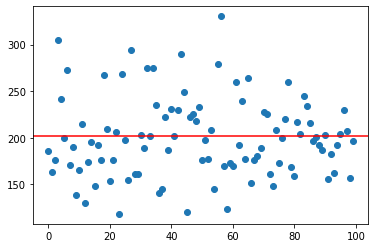

In [57]:
plt.scatter(range(100),stratified_mean)
plt.axhline(df['PTS'].mean(),c='red')